In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17%2F742210%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240722%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240722T170156Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D31d4133bfc861f8328d31b0cfca04633c2685aa56cd09271b9fb00e3082a2c6449304a3bcf81b49c041339094de86dbb08c2242fc549bba9a2a9390bc8e08b6a9ac90680082d74dd01923503eb7a5f132c5fc4b04f1de56a5329f7e3a720d989bbac596c0b2897b7a99c47c56c08afb9eb8ce882789ef4125007e245e3baef4c3913b4d7f2bee6be871a780ae90fa3d8acdb017365d0746b0e053b4aad81dc39badca59489db3532879b4b80902d123a86fa25302ab641d493317b179f8382d37fcd29415078262de31d03319eef11ce6be16c065dc8e24c6c6ac90e5abd1d2f46fce8ddd6562170641dfe94f29a6bf668205d2128052638729fb7d6b3959534'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2678605 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


# **A Bigineer NoteBook on NLP with RNN**
# **Kindly Upvote**

**Airline Sentiment Analysi**s is a natural language processing (NLP) task that involves identifying the sentiment expressed in a piece of text about an airline. Recurrent Neural Networks (RNNs) are a type of neural network that are particularly well-suited to modeling sequences of data, such as natural language text. In this task, we can use RNNs to classify tweets about airlines into positive, negative or neutral categories.

Here is a high-level overview of the steps involved in building an airline sentiment analysis model using RNNs:

1. Data Preprocessing: The first step is to prepare the data for training the RNN. This involves cleaning the text data by removing stop words, special characters, and URLs. We also tokenize the text data and convert it into numerical format.

2. Feature Extraction: Next, we convert the tokenized text data into a fixed-length vector using techniques such as Word2Vec or GloVe.

3. Model Building: We can build a Recurrent Neural Network (RNN) model to classify the sentiment of the airline tweets. We can use architectures such as Long Short-Term Memory (LSTM) or Gated Recurrent Units (GRU) to model the sequence of the text data.

4. Model Training: We can train the RNN model on the preprocessed and feature-extracted data. We can use techniques such as cross-validation to evaluate the model's performance.

5. Model Testing: We can test the trained model on new, unseen data to evaluate its performance.

**Here are the steps in more detail:**

**Data Preprocessing:**
We start by importing the necessary libraries for data cleaning and tokenization, such as NLTK and spaCy. We then load the airline tweets dataset and perform some initial data exploration. We can also remove any irrelevant or noisy data such as tweets that contain links or mentions of other Twitter users. After that, we perform text cleaning by removing stop words, special characters, and other noise from the text data. Finally, we tokenize the text data and convert it into numerical format for feature extraction.

**Feature Extraction:**
We can extract features from the tokenized text data using techniques such as Word2Vec or GloVe. These methods convert the text data into fixed-length vectors that can be fed into the RNN model. We can also use techniques such as tf-idf or bag-of-words to represent the text data.

**Model Building:**
We can build a Recurrent Neural Network (RNN) model to classify the sentiment of the airline tweets. We can use architectures such as Long Short-Term Memory (LSTM) or Gated Recurrent Units (GRU) to model the sequence of the text data. We can also use techniques such as dropout and batch normalization to regularize the model and prevent overfitting.

**Model Training:**
We can train the RNN model on the preprocessed and feature-extracted data. We can use techniques such as cross-validation to evaluate the model's performance. We can also use techniques such as early stopping to prevent the model from overfitting the training data.

**Model Testing:**
We can test the trained model on new, unseen data to evaluate its performance. We can use metrics such as accuracy, precision, recall, and F1 score to evaluate the model's performance on the test data. We can also use techniques such as confusion matrix and ROC curve to analyze the model's performance in more detail.

In summary, building an airline sentiment analysis model using RNNs involves data preprocessing, feature extraction, model building, model training, and model testing. With the right techniques and tools, we can build a robust and accurate model that can classify the sentiment of airline tweets with high accuracy.

# **Import the Neccesary Libraries**

In [2]:
import re
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)

# Reading the Dataset

In [3]:
data = pd.read_csv("../input/Tweets.csv")
df = data[["text","airline_sentiment"]]
df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))

<ipython-input-3-a917ea3854bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))


In [4]:
df

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to #BlackBerry10,neutral
14638,"you have my money, you change my flight, and ...",negative


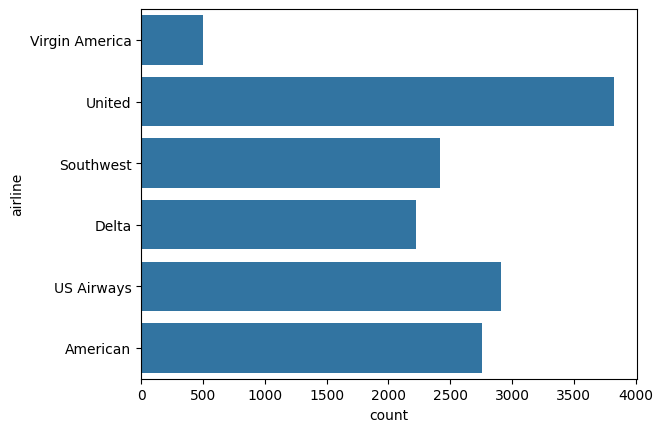

In [5]:
sns.countplot(data.airline);

In [6]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

<ipython-input-6-2e7e31eb758f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
<ipython-input-6-2e7e31eb758f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only


In [7]:
df.head(5) #Quick Look

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive


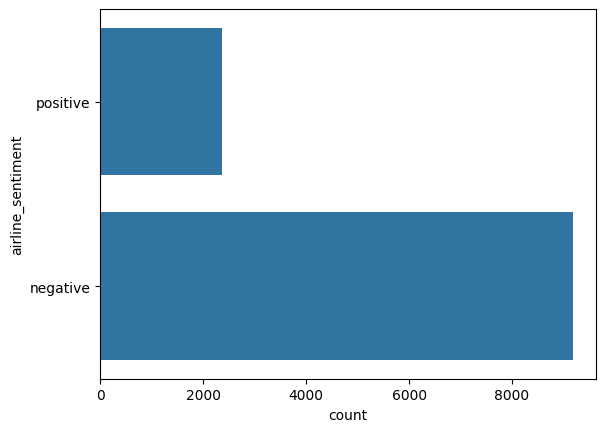

In [8]:
sns.countplot(df.airline_sentiment);#Mostly Negative Reviews(Class Imbalance found)

This next line of code drops the first 5000 rows where the value of the "airline_sentiment" column is "negative" from a pandas DataFrame called "df", due to unequal amount of negatives to positives

In summary, the code drops the first 5000 rows where the value of the "airline_sentiment" column is "negative" from the original DataFrame "df" and returns a new DataFrame without those rows.

In [9]:
df = df.drop(df[df.airline_sentiment == "negative"].iloc[:5000].index)

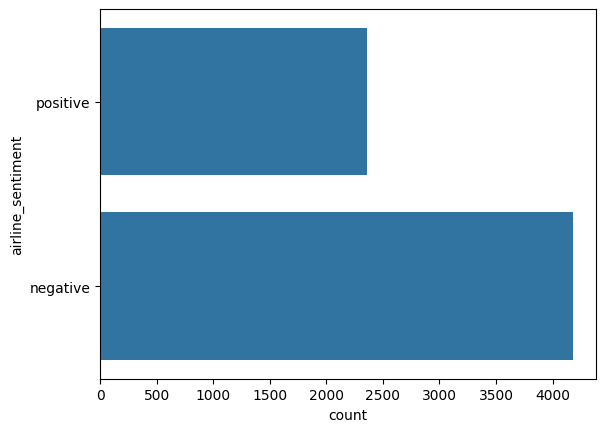

In [10]:
sns.countplot(df.airline_sentiment);

This code snippet uses the Keras Tokenizer and pad_sequences functions to preprocess text data. Specifically, it tokenizes the text data by splitting the text into individual words and then maps these words to integers. The maximum number of unique words to be considered is set to 4000 using the max_features parameter of the Tokenizer function.

After the text is tokenized, the pad_sequences function is used to ensure that all sequences have the same length by adding padding to the beginning or end of the sequences as needed. The resulting X variable is a two-dimensional numpy array where each row represents a sequence of integers corresponding to the words in the original text.

Overall, this code prepares the text data for use in a machine learning model by converting it into a format that can be easily processed by the model.

In [11]:
max_fatures = 4000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = df['airline_sentiment']
L = Y.values
X
L

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [12]:
k = []
for i in range(6541):
    if L[i]=="negative":
                        k.append(0)
    elif L[i]=="positive":
                        k.append(1)


**Train Test Split**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, k,
                                                    test_size=0.3,
                                                    shuffle = True,
                                                    stratify = k,
                                                    random_state = 1 )

# Defining the Model

In [14]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the Model

In [17]:
import numpy as np
import tensorflow as tf

# Assuming X_train and Y_train are lists of integers, convert them to NumPy arrays:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

Model = model.fit(X_train,
                 Y_train,
                 epochs=20,
                 batch_size=32,
                 validation_split = 0.2, # Now this should work as expected
                 verbose = 2)




# Model = model.fit(X_train,
#                          Y_train,
#                          epochs=20,
#                          batch_size=32,
#                          validation_split = 0.2,
#                          verbose = 2)

Epoch 1/20
115/115 - 23s - loss: 0.4953 - accuracy: 0.7662 - val_loss: 0.2953 - val_accuracy: 0.8755 - 23s/epoch - 198ms/step
Epoch 2/20
115/115 - 12s - loss: 0.2190 - accuracy: 0.9126 - val_loss: 0.2307 - val_accuracy: 0.9094 - 12s/epoch - 102ms/step
Epoch 3/20
115/115 - 12s - loss: 0.1487 - accuracy: 0.9432 - val_loss: 0.2119 - val_accuracy: 0.9269 - 12s/epoch - 104ms/step
Epoch 4/20
115/115 - 12s - loss: 0.1031 - accuracy: 0.9629 - val_loss: 0.2282 - val_accuracy: 0.9192 - 12s/epoch - 106ms/step
Epoch 5/20
115/115 - 13s - loss: 0.0712 - accuracy: 0.9760 - val_loss: 0.2464 - val_accuracy: 0.9225 - 13s/epoch - 113ms/step
Epoch 6/20
115/115 - 11s - loss: 0.0641 - accuracy: 0.9754 - val_loss: 0.2876 - val_accuracy: 0.9181 - 11s/epoch - 99ms/step
Epoch 7/20
115/115 - 12s - loss: 0.0501 - accuracy: 0.9823 - val_loss: 0.3029 - val_accuracy: 0.9279 - 12s/epoch - 106ms/step
Epoch 8/20
115/115 - 12s - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.3088 - val_accuracy: 0.9148 - 12s/epoch - 102m

In [19]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  0.6205897927284241
accuracy =  0.9021905064582825


**Plottiing the confusion matrix**

62/62 [==============================] - 1s 10ms/step


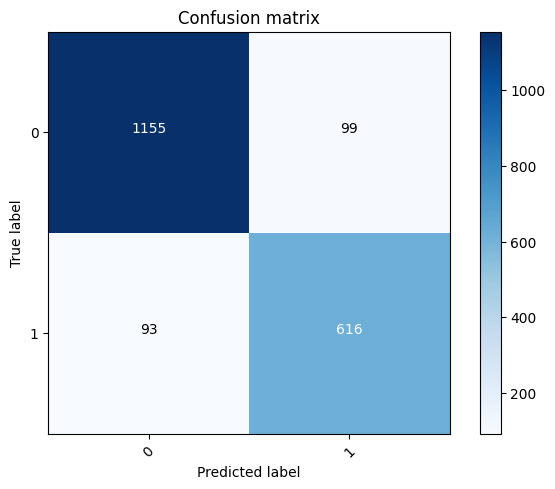

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
confusion_mtx = confusion_matrix(Y_test, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2))

# Model Test

In [21]:
sample = ['Meetings: Air crew is so dumb.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 2030  237  147
    11   40 2049]]
1/1 - 0s - 88ms/epoch - 88ms/step
negative


In [22]:
# prompt: save and downlowad model into google drive

from google.colab import drive
drive.mount('/content/gdrive')

# Change the directory to your desired location in Google Drive
model_save_path = '/content/gdrive/My Drive/Colab Notebooks/my_model.h5'
model.save(model_save_path)

# Download the model file
from google.colab import files
files.download(model_save_path)


Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# prompt: make a streamlit application that take input text and then perform sentement analysis

%%writefile app.py
import streamlit as st
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the saved model
model_path = 'my_model.h5'  # Update with your actual model path
model = tf.keras.models.load_model(model_path)

# Initialize the tokenizer (assuming same parameters as during training)
max_fatures = 4000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
# You need to fit the tokenizer on the same data as during training
# If you don't have that data readily available, you might need to
# load a saved tokenizer or re-fit on a representative dataset.

# Streamlit app
st.title("Airline Sentiment Analysis")

user_input = st.text_area("Enter your tweet about an airline:")

if st.button("Analyze"):
    if user_input:
        # Preprocess the input text
        sample = tokenizer.texts_to_sequences([user_input])
        sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)

        # Predict sentiment
        sentiment = model.predict(sample, batch_size=1, verbose=0)[0]
        predicted_class = np.argmax(sentiment)

        if predicted_class == 0:
            st.write("Sentiment: Negative")
        elif predicted_class == 1:
            st.write("Sentiment: Positive")
    else:
        st.write("Please enter some text.")

!streamlit run app.py


Writing app.py


In [24]:
# prompt: how to run application

!streamlit run app.py


/bin/bash: line 1: streamlit: command not found
